In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
titanic_df= pd.read_csv('titanic_train.csv')
print(titanic_df.shape)
# totals rows and columns 

titanic_df.columns
titanic_df.describe()


(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


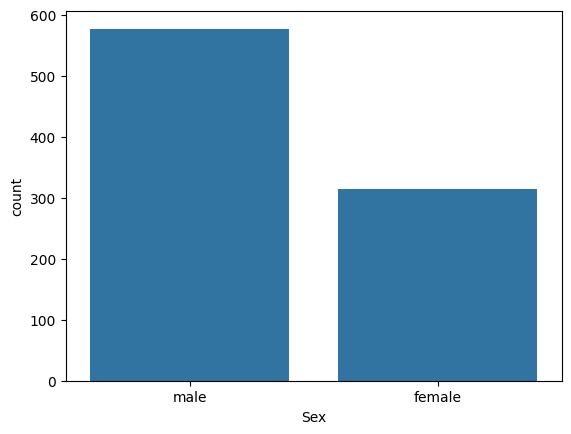

In [8]:
# 38% passengers survived
# lets see how many are males and females

sns.countplot(x='Sex', data= titanic_df)
plt.show()

# Most of the passengers ar males

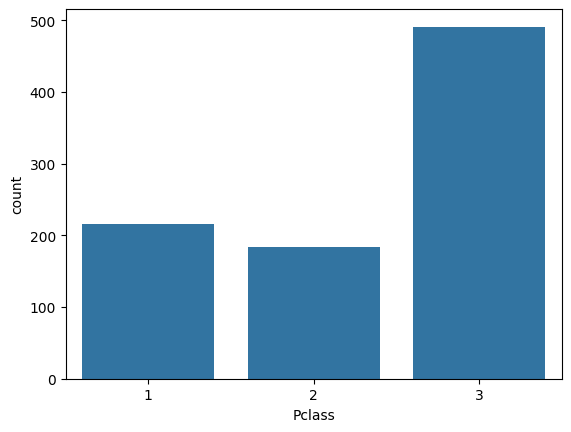

In [9]:
# How passengers are distributed

sns.countplot(x='Pclass', data= titanic_df)
plt.show()

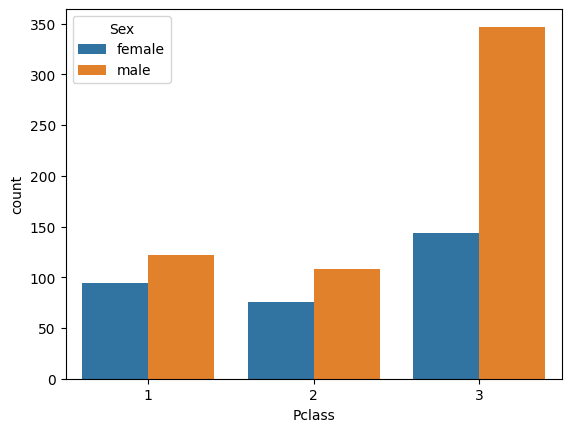

In [11]:
sns.countplot(x='Pclass', data= titanic_df, hue='Sex')
plt.show()

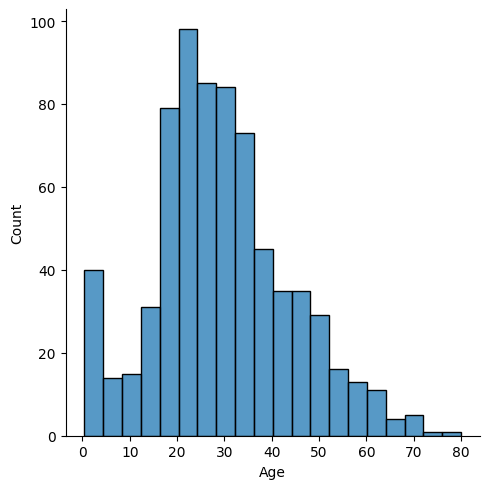

In [12]:
sns.displot(titanic_df['Age'], kde= False, bins= 20)
plt.show()

In [17]:
# Titanic sibling s

titanic_df['along']= titanic_df['SibSp']+ titanic_df['Parch']
titanic_df['along'].loc[titanic_df['along']>0]=1
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


<Axes: xlabel='Pclass', ylabel='count'>

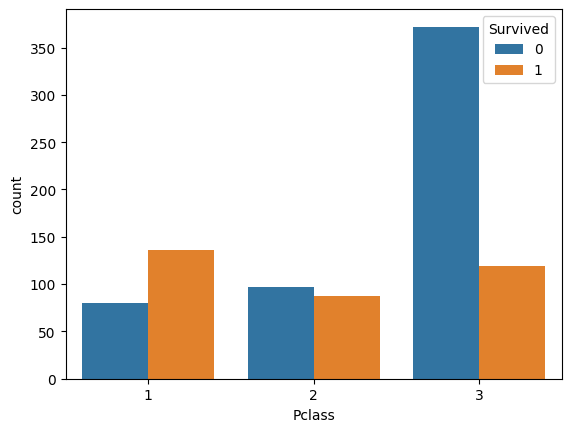

In [7]:
# Factors to survive

sns.countplot(x='Pclass', data= titanic_df, hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

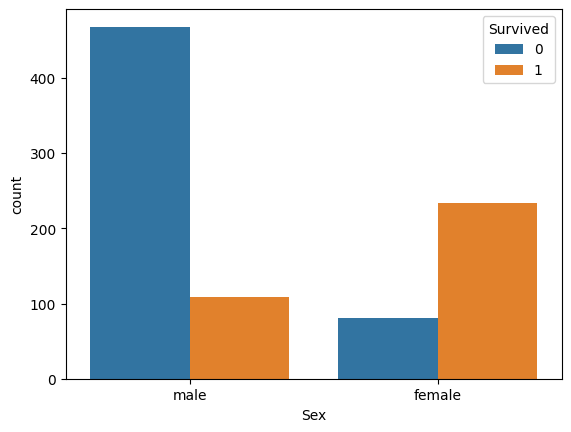

In [8]:
# Most of the people from 3 class died whereas 1 class survived
# lets see gender is a feature or not?

sns.countplot(x='Sex', data= titanic_df, hue='Survived')

In [12]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
# Data Pre-Processing 
# Like we have to delete the irrelavant columns 
# Like- Name, Cabin no. , Passenger id and many more...

# titanic_df= titanic_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [22]:
titanic_df['Sex'].loc[titanic_df['Sex'] =='male'] = 1

titanic_df['Sex'].loc[titanic_df['Sex'] =='female'] = 0

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<Axes: >

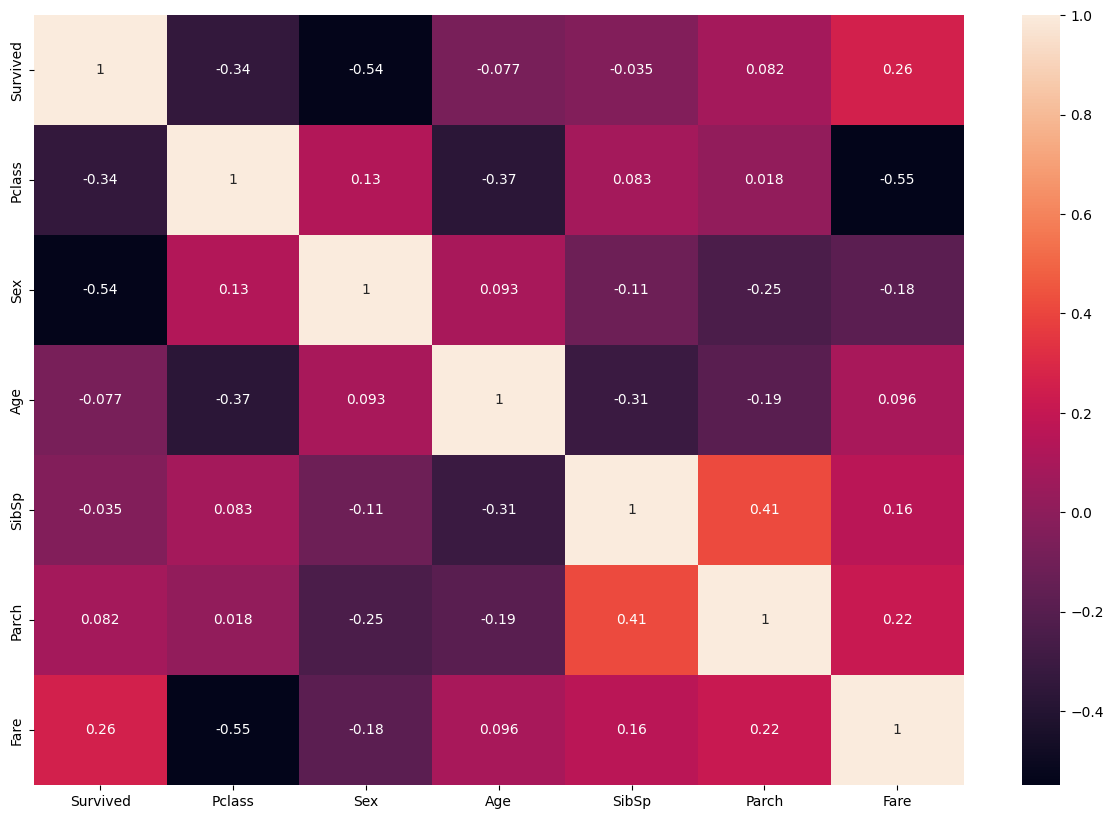

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic_df.corr(), annot=True)

In [24]:
# Handling missing values
titanic_df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

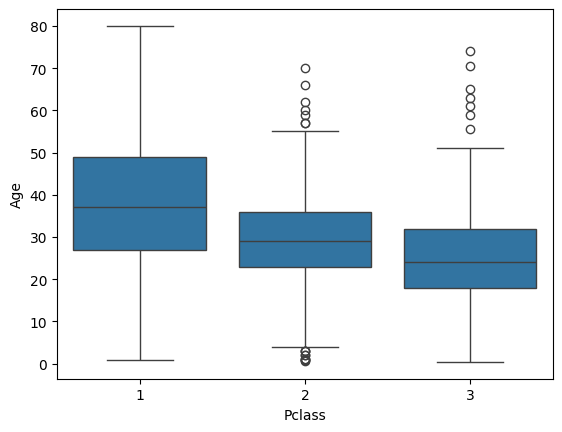

In [27]:
sns.boxplot(x='Pclass', y= 'Age', data=titanic_df)

In [35]:

for i in range(3):
    print(titanic_df.loc[titanic_df['Pclass']==i+1]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [39]:
def fill_age(row):
    age= row[0]
    pclass= row[1]

    if pd.isnull(age):
      if pclass==1:
         return 38.23
      elif pclass==2:
         return 29.87
      else:
         return 25.14
    else:
       return age  



titanic_df['Age']= titanic_df[['Age', 'Pclass']].apply(fill_age,axis=1)

0.8342696629213483
0.8212290502793296


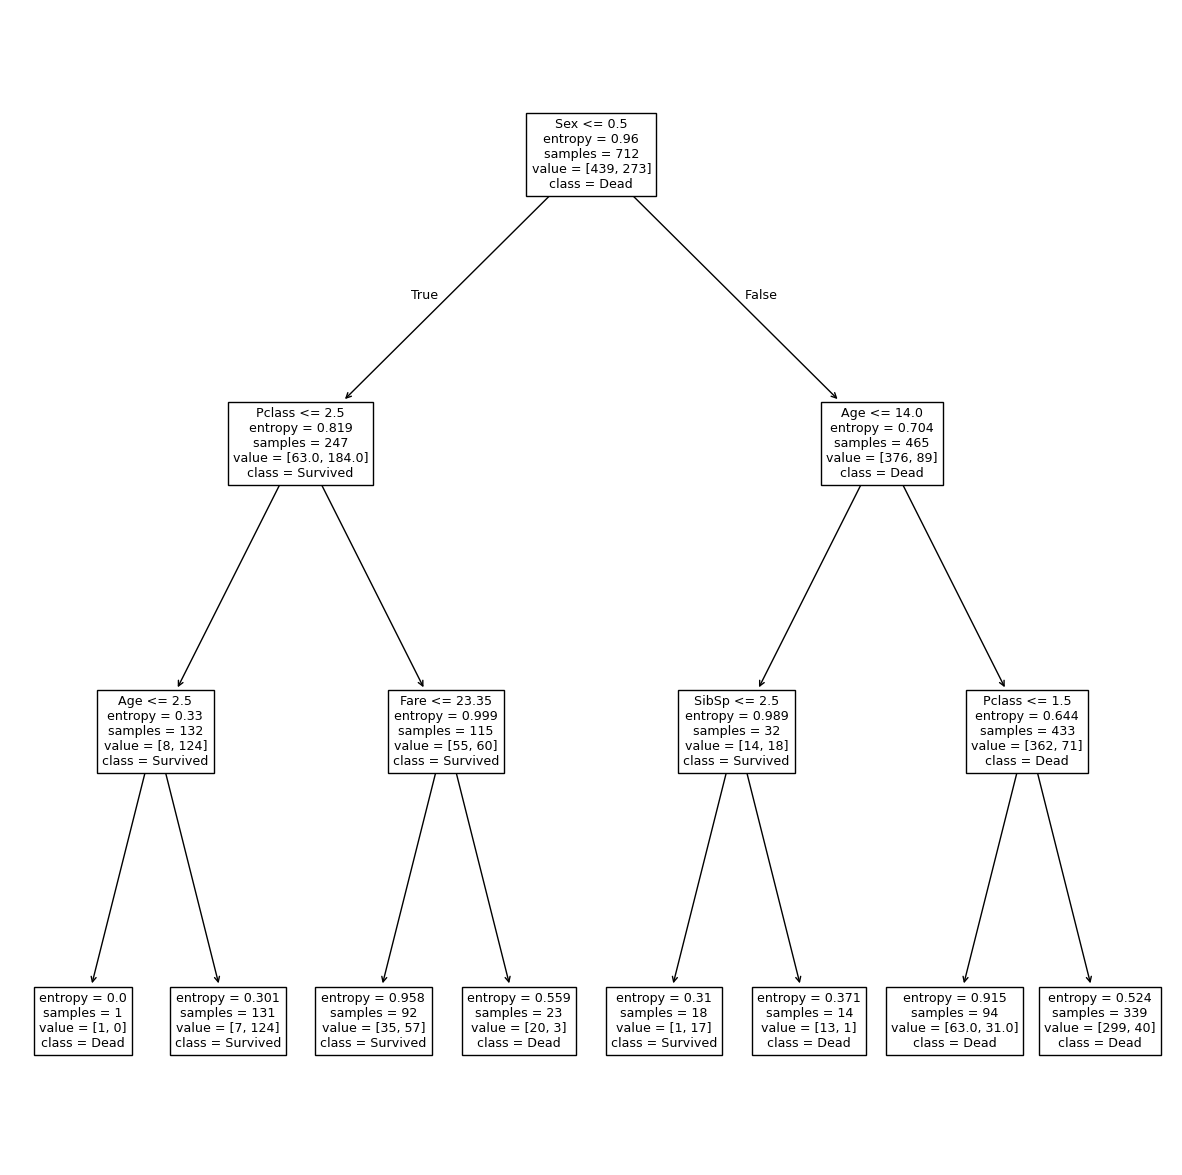

In [56]:
X= titanic_df.drop(columns=['Survived'])

y= titanic_df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X.values, y.values, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(criterion='entropy', max_depth=3)

model.fit(X_train, y_train)

y_pred= model.predict(X_test)
y_pred

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# This is overfitting, 
# We can use max_depth, we dont want extra features


from sklearn import tree

features= X.columns
plt.figure(figsize=(15,15))
result= tree.plot_tree(model, feature_names=features, class_names=['Dead', 'Survived'])

